 # 爬虫模块

* ## 新华每日电讯

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import json
import re
import os

class Spider():
    def __init__(self,keyword):
        
        self.log=self.init_info(keyword)
        self.filename=self.get_max_filename(keyword)
        
        self.keyword=keyword
        self.url="http://so.news.cn/was5/web/conwebsite/getNews"
        self.headers={
            'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36',
            'Referer':'http://www.xinhuanet.com/',
            
        }
        self.params={
            'siteId': '11148',
            'pageNo': '2',
            'pageSize': '10',
            'senior': '0',
            'titleInclude': '1',
            'condition': '1',
            'textInclude': '1',
            'sort': '1',
            'keyword': keyword,
            't': '1637493590751',
        }
        
        for page in tqdm(range(self.log['新华每日电讯'][keyword],500),ncols=90):
            self.params['pageNo']=page
            self.get_first_page()
            self.log['新华每日电讯'][keyword] += 1
            self.flush_log()
            
            
    def flush_log(self):
        file=open('data/log.txt','w')
        file.write(json.dumps(self.log))
        file.close()
        
    def get_max_filename(self,keyword):
        MAX=0
        for i in os.listdir('data/CHA/%s'%keyword):
            if i[0]=='.':
                continue
            if int(i.split('.')[0])>MAX:
                MAX = int(i.split('.')[0])+1
                
        return MAX
    
    def init_info(self,keyword):
        file=open('data/log.txt','r')
        t=file.read()
        js=json.loads(t)
        file.close()
        if not '新华每日电讯' in js:
            js['新华每日电讯']={keyword:1}
            
        return js
    
    def get_first_page(self):
        r=requests.get(self.url,headers=self.headers,params=self.params)
        r.encoding='utf-8'
        js=json.loads(r.text)
        for i in js['content']['result']:
            title=re.sub('[^\u4e00-\u9fa5，。？！]','',i['shortTitle'])
            date=i['releaseDate']
            url=i['originUrl'][0]
            content=self.get_content(url)
            content=re.sub('[^\u4e00-\u9fa5，。？！]','',content)
            file=open('data/CHA/%s/%s.txt'%(self.keyword,self.filename),'w')
            file.write(title+'\n')
            file.write(date+'\n')
            file.write(content+'\n')
            file.close()
            self.filename += 1
        

    def get_content(self,url):
        
        r=requests.get(url,headers=self.headers)
        r.encoding='utf-8'
        soup=BeautifulSoup(r.text,'lxml')
        content=soup.select('div.main-content-box')[0].text.strip()
        return content
            
            
#Spider('核酸')

* ## 人民网

In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import json
import re
import os
import time

class Spider():
    def __init__(self,keyword):
        self.web_name="人民网"
        self.log=self.init_info(keyword)
        self.filename=self.get_max_filename(keyword)
        
        self.keyword=keyword
        self.url="http://search.people.cn/search-platform/front/search"
        self.headers={
            'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36',
            #'Referer':'http://www.xinhuanet.com/',
            'Cookie':'__jsluid_h=d4f4332fb392a40cea16443f48a1f184; sso_c=0; sfr=1',
            'Origin':'http://search.people.cn',
            'Referer':'http://search.people.cn/s?keyword=%E6%A0%B8%E9%85%B8&st=0&_=1637496405242',
            'Content-Type':'application/json',
            
        }
        self.data={
            'endTime': 0,
            'hasContent': 'true',
            'hasTitle': 'true',
            'isFuzzy': 'true',
            'key': keyword,
            'limit': 10,
            'page': 2,
            'sortType': 2,
            'startTime': 0,
            'type': 0,
        }
        
        for page in tqdm(range(self.log[self.web_name][keyword],500),ncols=90):
            self.data['page']=page
            self.get_first_page()
            self.log[self.web_name][keyword] += 1
            self.flush_log()
            
            
    def flush_log(self):
        file=open('爬虫/log','w')
        file.write(json.dumps(self.log))
        file.close()
        
    def get_max_filename(self,keyword):
        MAX=0
        for i in os.listdir('data/CHA/%s'%keyword):
            if i[0]=='.':
                continue
            if int(i.split('.')[0])>MAX:
                MAX = int(i.split('.')[0])+1
                
        return MAX
    
    def init_info(self,keyword):
        file=open('爬虫/log','r')
        t=file.read()
        js=json.loads(t)
        file.close()
        if not self.web_name in js:
            js[self.web_name]={keyword:1}
            
        return js
    
    def get_first_page(self):
        r=requests.post(self.url,headers=self.headers,data=json.dumps(self.data))

        js=json.loads(r.text)
        for i in js['data']['records']:
            title=re.sub('[^\u4e00-\u9fa5，。？！]','',i['title'])
            date=i['displayTime']/1000
            date=time.localtime(date)
            date=time.strftime('%Y-%m-%d %H:%M:%d',date)
            url=i['url']
            content=self.get_content(url)
            content=re.sub('[^\u4e00-\u9fa5，。？！]','',content)

            file=open('data/CHA/%s/%s.txt'%(self.keyword,self.filename),'w')
            file.write(title+'\n')
            file.write(date+'\n')
            file.write(content+'\n')
            file.close()
            self.filename += 1
        

    def get_content(self,url):
        
        r=requests.get(url,headers=self.headers)
        r.encoding='gbk'
        #print(r.text)
        soup=BeautifulSoup(r.text,'lxml')
        content=soup.select('div.rm_txt_con')[0].text.strip()
        return content
            
        
if __name__=="__main__":

    Spider('核酸')

  0%|                                                             | 0/499 [00:00<?, ?it/s]

核酸检测前后注意哪些问题？ 2021-10-25 08:42:25 由于疫情反复，核酸检测最近又成了一个热门话题。哪些人要做核酸检测？做完核酸检测就可以放心了吗？核酸检测前后需要注意哪些问题？日，湖南省疾控专家进行了详细解答。哪些人需要做核酸检测？首先，和病例有过近距离接触且未采取有效防护的密切接触者，以及密切接触者的密切接触者又称次密接，都需要尽快进行集中医学观察并开展核酸检测。其次，由于目前德尔塔变异株强悍的传播能力，和病例在同一个密闭空间以及在病例离开后短时间内进入者，通过大数据被判定为与病例存在时空伴随者，有中高风险地区旅居史者，都需要进行核酸检测。通常，这些人员都会被赋予黄码。如果出现本地疫情，疾控部门为了快速搜索病例以斩断传播链，会在开展风险评估的基础上给出需要在一定范围内开展全员核酸检测的建议。另外，属于高风险岗位的人群必须根据岗位风险程度定期开展核酸检测。做完核酸检测就可以放心了吗？从国内发生的多起疫情都需要多轮核酸检测来看，答案显然是否定的。从以往的防控经验来看，出现过多次核酸检测都是阴性的境外输入病例，而这与采样人员的技术水平采样时机已感染而尚未开始排毒病毒在体内的滴度检测试剂的灵敏度检测人员的操作水平等都息息相关。核酸检测前后注意哪些问题？检测前做核酸检测前小时尽量避免进食，以免引起呕吐采样前分钟做到不喝饮料包括不喝水不吸烟不喝酒不咀嚼口香糖等临检要减少吞咽动作，不做清嗓子例如咳痰吐痰动作。采集鼻咽拭子前，被检测者应告知采集人员是否有相关既往病史或相关事项。检测者需要正确佩戴口罩，检测前取下口罩，检测后立即戴好，可准备一个备用口罩，污染后方便随时更换。检测中在采集口咽拭子时，被检测者头后仰，张口发出啊音，有助于暴露咽喉，但过程中会出现刺激性干咳恶心呕吐等症状，被检测者可配合采集人员尽量放松深呼吸采集过程中可能出现鼻部酸痒感，刺激打喷嚏，可立即用纸巾提前备好或手肘遮挡。检测后采集后立即离开采集地点，避免在采集地点周围吐痰呕吐。核酸检测前后都需要注意手部卫生，可使用免洗手消毒液或免洗酒精擦拭双手。大规模核酸检测期间，为了确保医务人员集中精力开展核酸检测，往往会暂停疫苗接种工作。外省防控经验曾经提出一项建议本地疫情期间，尽量在接种新冠疫苗小时内不要进行核酸检测。记者通讯员蔡亮孙倩莱张亚娜责编唐李晗彭应兵分享让更多人看到
{'新华每日电讯': {'核酸

AssertionError: 

In [33]:
import time
timestamp=1633539060000/1000
d=time.localtime(timestamp)
time.strftime('%Y-%m-%d %H:%M:%d',d)

'2021-10-07 00:51:07'

In [13]:
import re
t="""他们，是“藏蓝青”“荧光黄”“蓝帽子”，是让人放心的坚实后盾。
　　“各供电设备运行稳定。”国网大连供电公司维修工罗昊在寒风中排除金普新区方舱核酸检测实验室供电隐患，“专人现场24小时驻守保电，配置应急发电车，咱‘蓝帽子’不能‘掉链子’。”
　　截至目前，大连全市共有8778名社区干部、17708名志愿者、21600名公安干警投身疫情防控阻击战。
　　他们，都是这场战“疫”的脊梁，每个名字都熠熠发光。
"""
re.sub('[^\u4e00-\u9fa5，。？！]','',t)

'他们，是藏蓝青荧光黄蓝帽子，是让人放心的坚实后盾。各供电设备运行稳定。国网大连供电公司维修工罗昊在寒风中排除金普新区方舱核酸检测实验室供电隐患，专人现场小时驻守保电，配置应急发电车，咱蓝帽子不能掉链子。截至目前，大连全市共有名社区干部名志愿者名公安干警投身疫情防控阻击战。他们，都是这场战疫的脊梁，每个名字都熠熠发光。'

In [8]:
import os
import pandas as pd
from tqdm import tqdm
import jieba
from jieba import posseg
from sklearn.feature_extraction.text import CountVectorizer
import random
def get_words(filename):
    """
    :param filename:   文件名
    :return: list，每个元素为一个词
    """
    words = []
    file = open(filename, 'r')
    text = file.read()
    file.close()
    sentence = posseg.cut(text)
    for x in sentence:
        if x.flag == 'n':
            words.append(x.word)

    return words


def get_stop_words(path):
    file = open(path, 'r', encoding='gbk')

    words = [i.strip() for i in file.readlines()]
    file.close()
    return words


if __name__ == "__main__":
    words = []
    
    stop_words=get_stop_words('data/stop_words.txt')
    
    #useful_words = pd.read_excel('words.xlsx').iloc[:,0].tolist()
    conVector = CountVectorizer(stop_words = stop_words)
    
    for i in tqdm(random.sample(os.listdir('data/China/'),2000), ncols=90):
        if i[0] == '.':
            continue
        word = get_words('data/China/%s' % i)
        
        words.append(' '.join(word))

    print(len(words))



FileNotFoundError: [Errno 2] No such file or directory: 'data/China/'

In [132]:
vector = conVector.fit_transform(words)


In [133]:
from sklearn.decomposition import LatentDirichletAllocation

lda=LatentDirichletAllocation(n_components=2,max_iter=50,learning_offset=50)
docres = lda.fit_transform(vector.toarray())

In [134]:
y=docres.argmax(axis=1)
from sklearn.feature_selection import chi2,SelectKBest
#f,p_value = chi2(vector.toarray(),y)
model=SelectKBest(chi2,k=100)
new_feature = model.fit_transform(vector.toarray(),y)

In [135]:
index = model.get_support()
words = pd.Series(conVector.get_feature_names())[index]

In [136]:
lda=LatentDirichletAllocation(n_components=4,max_iter=50,learning_offset=50)
docres = lda.fit_transform(new_feature)

In [137]:
ser = pd.Series(words.tolist())


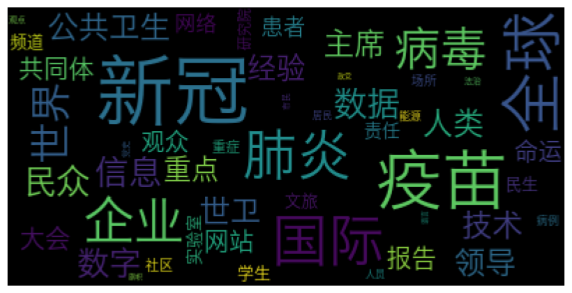

In [146]:
import numpy as np
dd=lda.components_[0]
index=np.argsort(dd)[::-1]
#ser=pd.Series(words)
d=dict(zip(ser[index],dd[index]))
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
ser2=pd.Series(d)
cloud=WordCloud(font_path='/system/library/fonts/Hiragino Sans GB.ttc')
s=cloud.fit_words(d)
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(s)
plt.savefig('1.png',dpi=400)

In [6]:
import os
import pandas as pd
from tqdm import tqdm
import jieba
from jieba import posseg
def get_words(filename):
    words=[]
    file=open(filename,'r')
    text=file.read()
    file.close()
    sentence = posseg.cut(text)
    for x in sentence:
        if x.flag =='n':
            words.append(x.word)
            
    return words

def get_stop_words(path):
    file=open(path,'r',encoding='utf-8')
    words=[i.strip() for i in file.readlines()]
    file.close()
    return words
    
if __name__=="__main__":
    words=[]
    for i in tqdm(os.listdir('data/ChA/疫苗/')[:100],ncols=90):
        if i[0]=='.':
            continue
        try:
            word=get_words('data/ChA/%s'%i)
        except:
            continue
        words.append(' '.join(word))
        
    

100%|████████████████████████████████████████████████| 100/100 [00:00<00:00, 34555.15it/s]


In [7]:
words

[]

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()
model=tf_idf.fit_transform(words)

In [130]:
t=model.toarray().sum(axis=0)

In [131]:
words=tf_idf.get_feature_names()

In [135]:
index=t.argsort()[::-1]

In [146]:
import pandas as pd
ser=pd.Series(words)
ser[index[:40]]

242      人民
2805     疫情
245     人民网
2819     病例
1089     国家
2061     新冠
3170     网站
1683     强国
1019     周刊
3461     论坛
3911     领导
2338     核酸
3429     视频
2077     新闻
224      人员
3115     经济
2797    留言板
394      信息
3245     肺炎
500      全球
1940     措施
2808     疫苗
454      党史
1103     国际
3087     纪念
1107     图片
2914    研究院
490      全国
3175     网络
3689     邮箱
2828     病毒
951      口罩
3725     重点
2156     时间
3061     精神
2928     社会
2934     社区
838      医院
173     互联网
1116     地区
dtype: object

In [124]:
t[242]

14.793086969048248

In [29]:
df=pd.DataFrame(data=[[1,2]],columns=['a','c'])
df

,a,c
0,1,2


In [92]:
x=model.toarray()
from sklearn.feature_selection import chi2
f,p_value = chi2()

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.decomposition import LatentDirichletAllocation
import json
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.cluster import KMeans
import imageio
import shutil
import os
plt.rcParams['font.sans-serif']=['Arial Unicode Ms']

    


def get_stop_words(filename):
    file=open(filename,'r',encoding='gbk')
    stop_words = file.read().split('\n')
    file.close()
    return stop_words


def get_plot(d,n_components,filename,cloud_num_words=100,lang="CHA"):

    stop_words = get_stop_words('data/stop_words.txt')
    data=d['content'].values.tolist()
    classifier = d['class'].tolist()
    cotVector = CountVectorizer(stop_words=stop_words)
    vector=cotVector.fit_transform(data)
    word_array = vector.toarray()
    feature_name = cotVector.get_feature_names()
    feature_name[:10]
    words = pd.Series(feature_name)
    print("LDA......")
    lda = LatentDirichletAllocation(n_components=n_components,learning_offset=50,max_iter=50)
    docres = lda.fit_transform(word_array)
    print("LDA successful !!")
    print("正在进行聚类......")
    model=KMeans(n_clusters=n_components)
    classifier=model.fit_predict(docres)
    print("聚类 successful !!")
    print("chi.....")
    f,p_value = chi2(word_array,classifier)
    model=SelectKBest(chi2,k=200)
    print("chi successful !!")
    new_word_array = model.fit_transform(word_array,classifier)
    words=words[model.get_support()]
    words=pd.Series(words.tolist())
    print("LDA....")
    lda = LatentDirichletAllocation(n_components=n_components,learning_offset=50,max_iter=50)
    
    docres = lda.fit_transform(new_word_array)
    print(lda.components_.shape)
    print(docres.shape)
    print(words)
    print(new_word_array.shape)
    print("LDA successful !!!")
    mask = imageio.imread('data/China.png')
    if lang=="ENG":
        mask = imageio.imread('data/USA.png')
    for t_index in range(n_components):

        index = lda.components_[t_index].argsort()[-cloud_num_words:]
        ws = words[index].tolist()
        i = lda.components_[t_index][index]
        #cloud=WordCloud(font_path='C:/Windows/simhei.ttf')   #window
        cloud = WordCloud(font_path='/system/library/fonts/Hiragino Sans GB.ttc',scale=8,mask=mask)  #mac
        s=cloud.fit_words(dict(zip(ws,i)))
        plt.figure(figsize=(16, 16))
        #plt.imshow(s)

        cloud.to_file(filename+'%s.png'%t_index)

def main(method,n_components,lang="CHA",cloud_num_words=100):


    file = 'useful_data_CHA.csv'
    if lang=="ENG":
        file='useful_data_ENG.csv'
    df=pd.read_csv('data/%s'%file,encoding='gbk').head(2000)
    df.loc[:,'date']=pd.to_datetime(df.date)
    df.set_index('date',inplace=True)
    slic = []
    if method=='季':
        slic.append(['2020-1','2020-4'])
        slic.append(['2020-4','2020-7'])
        slic.append(['2020-7','2020-10'])
        slic.append(['2020-10','2021-1'])
        slic.append(['2021-1','2021-4'])
        slic.append(['2021-4','2021-7'])
        slic.append(['2021-7','2021-12'])
    elif method=='半年':
        slic.append(['2020-1','2020-7'])
        slic.append(['2020-7','2021-1'])
        slic.append(['2021-1','2021-7'])
        slic.append(['2021-7','2021-12'])
    elif method=='年':
        slic.append(['2020-1','2021-1'])
        slic.append(['2021-1','2021-12'])

    for i in slic:

        d=df.loc[i[0]:i[1],:]
        date = i[0]+'~'+i[1]
        print('正在生成,' + date+',图像')
        get_plot(d,n_components,'Img/%s/%s,%s,'%(method,lang,date),lang=lang)

if __name__=="__main__":

    main('季',3,lang="ENG")
    

正在生成,2020-1~2020-4,图像
LDA......


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(99, 3)
0      accelerated
1         actively
2           africa
3          african
4         approach
          ...     
195            win
196           wont
197          wuhan
198             xi
199       zimbabwe
Length: 200, dtype: object
(99, 200)
LDA successful !!!
正在生成,2020-4~2020-7,图像
LDA......


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(180, 3)
0      achieve
1       africa
2      african
3           ai
4          air
        ...   
195    website
196     window
197      wuhan
198         xi
199       york
Length: 200, dtype: object
(180, 200)
LDA successful !!!
正在生成,2020-7~2020-10,图像
LDA......


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(172, 3)
0      achievements
1           affairs
2           african
3        ambassador
4       anniversary
           ...     
195          window
196         workers
197              xi
198            yang
199              yi
Length: 200, dtype: object
(172, 200)
LDA successful !!!
正在生成,2020-10~2021-1,图像


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA......
LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(391, 3)
0      address
1       africa
2      african
3           ai
4          app
        ...   
195    workers
196      wuhan
197         xi
198         yi
199       york
Length: 200, dtype: object
(391, 200)
LDA successful !!!
正在生成,2021-1~2021-4,图像


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA......
LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(596, 3)
0          achieved
1      achievements
2            africa
3           african
4         americans
           ...     
195           white
196              xi
197             xis
198              yi
199            york
Length: 200, dtype: object
(596, 200)
LDA successful !!!
正在生成,2021-4~2021-7,图像


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA......
LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(556, 3)
0          achieve
1             acid
2          advance
3      afghanistan
4           africa
          ...     
195         window
196             xi
197            xis
198             yi
199         yunnan
Length: 200, dtype: object
(556, 200)
LDA successful !!!
正在生成,2021-7~2021-12,图像


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


LDA......
LDA successful !!
正在进行聚类......
聚类 successful !!
chi.....
chi successful !!
LDA....
(3, 200)
(575, 3)
0          achieve
1          advance
2      afghanistan
3           agenda
4      anniversary
          ...     
195         womens
196            won
197             xi
198            xis
199    zhangjiakou
Length: 200, dtype: object
(575, 200)
LDA successful !!!


<ipython-input-30-971853fe2b6f>:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 16))


<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [99]:
lda.fit(array)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=5,
                          random_state=0)

In [103]:
for topic in lda.components_:
    print([i for i in topic.argsort()[:-10:-1]])

[4613, 6248, 5729, 3390, 8951, 7981, 7346, 3502, 7417]
[11685, 3228, 7499, 1682, 9650, 6728, 8767, 7515, 4766]
[8128, 712, 715, 8150, 3151, 5985, 9248, 6743, 10095]
[7675, 459, 715, 549, 10932, 7072, 3875, 9902, 2414]
[8548, 4562, 5941, 3113, 6239, 6905, 1539, 11069, 8665]


AttributeError: 'list' object has no attribute 'argsort'

In [23]:
for x in sentence:
    if x.flag =='n':
        words.append(x.word)